# Preprocesamiento de Imagens 

mano-abierta.jpg - Umbral Otsu: 196.0


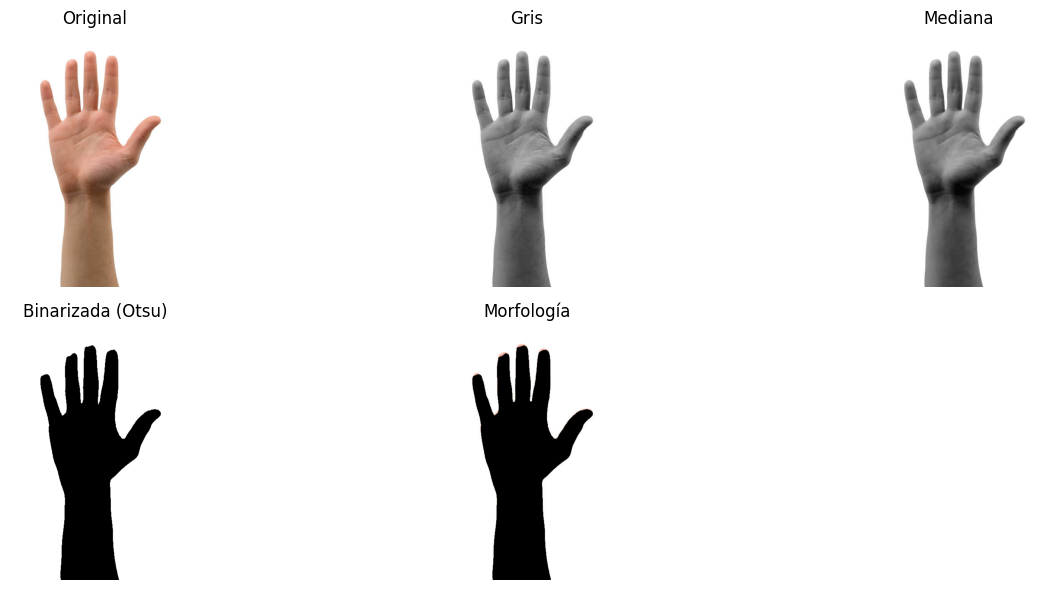

Guardado: data/procesadas\mano-abierta_proc.jpg
mano-cerrada.jpg - Umbral Otsu: 211.0


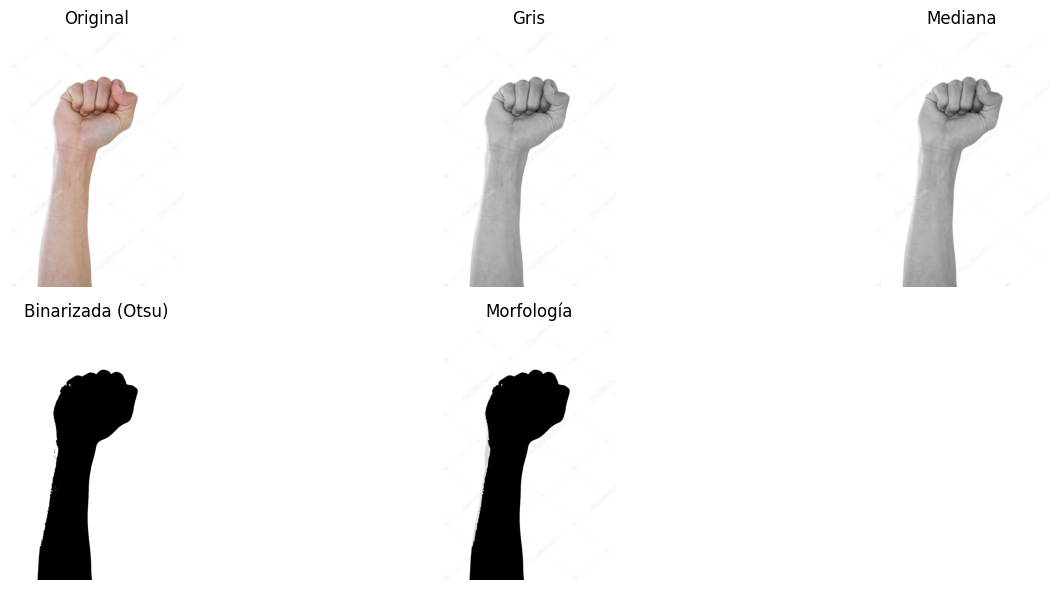

Guardado: data/procesadas\mano-cerrada_proc.jpg


In [27]:
import cv2
import matplotlib.pyplot as plt
import os

# Crear directorio de resultados
os.makedirs('data/procesadas', exist_ok=True)

# Lista de imagenes
imagenes = ['data/inputs/mano-abierta.jpg', 'data/inputs/mano-cerrada.jpg']

for imagen in imagenes:
    # Leer imagen
    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # 1) Convertir a escala de grises (y redimensionar si quieres)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2) Filtro de mediana (reduce ruido sal/pimienta) - ksize impar >=3
    median = cv2.medianBlur(gray, 5)

    # 3) Binarizar con Otsu (devuelve (umbral, imagen))
    thresh_val, binarizada = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"{os.path.basename(imagen)} - Umbral Otsu: {thresh_val}")

    # 4) Operaciones morfológicas para limpiar el resultado
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    img_morph = cv2.morphologyEx(binarizada, cv2.MORPH_CLOSE, kernel, iterations=2)
    img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_OPEN, kernel, iterations=1)

    # Asegurarse de que img_morph es uint8 con 0/255
    img_morph = (img_morph > 0).astype('uint8') * 255

    # Mostrar resultados (2x3) — usamos 2 filas x 3 columnas para 5 imágenes
    plt.figure(figsize=(14, 6))

    plt.subplot(2, 3, 1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 2)
    plt.title('Gris')
    plt.axis('off')
    plt.imshow(gray, cmap='gray')

    plt.subplot(2, 3, 3)
    plt.title('Mediana')
    plt.axis('off')
    plt.imshow(median, cmap='gray')

    plt.subplot(2, 3, 4)
    plt.title('Binarizada (Otsu)')
    plt.axis('off')
    plt.imshow(binarizada, cmap='gray')

    plt.subplot(2, 3, 5)
    plt.title('Morfología')
    plt.axis('off')
    plt.imshow(img_morph, cmap='gray')

   
    # aplicar máscara a la imagen color para visualizar
    mask_bool = img_morph.astype(bool)
    masked_color = img.copy()
    masked_color[~mask_bool] = 0
    plt.imshow(cv2.cvtColor(masked_color, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

    # Guardar resultado procesado con sufijo para no sobreescribir
    nombre = os.path.splitext(os.path.basename(imagen))[0]
    ext = os.path.splitext(os.path.basename(imagen))[1] if os.path.splitext(os.path.basename(imagen))[1] else '.png'
    salida = os.path.join('data/procesadas', f"{nombre}_proc{ext}")
    # img_morph es una imagen en escala de grises (0/255) — cv2.imwrite la guarda correctamente
    cv2.imwrite(salida, img_morph)
    print(f"Guardado: {salida}")